<a href="https://colab.research.google.com/github/DenisGubanov/Coursework-online-school-of-generations/blob/main/backup-v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install инструментов.

flag = True
if (flag):

  # Установка mplfinance для построения графиков.
  !pip install mplfinance

  # Установка pmdarima для прогнозирования временных рядов.
  !pip install pmdarima

  # Установка ta для технического анализа финансовых данных.
  !pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Подключение библиотек

# Работа с математическим инструментом
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Работа с фин. моделями
import ta

# Построение графиков
import matplotlib.pyplot as plt
import mplfinance as mpf

# Работа с датами и временем
from datetime import datetime, timedelta

# Инструменты ML
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, Dropout, LSTM, Dense, Flatten, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L2

# Дополнительные инструменты
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# | Если необходимо добавить файл. Обратитесь в раздел добавления Тренеровочных данных чуть ниже.
# | Если необходимо добавить меток, основанных на price. Обратитесь к разделу Генерация дополнительных.

# | Глобальная переменная col - отвечающая за метки price.
# | close_count_future - кол-во меток close_...
col_price = ['price', 'open', 'high', 'low', 'change']
close_count_future = 10

# Функция загрузки, обработки и сохранения исторических данных по цене актива.
# Аргументы: path - путь к файлу с исходными данными, close_count_future - количество будущих цен закрытия для добавления в датасет
# Возвращает обработанный датасет и список столбцов.
def append_price(path, close_count_future):

  # Загрузка и обработка данных
  df = pd.read_csv(path)

  # Обработка данных
  df.drop(columns=['Vol.',], inplace=True)
  col_ = ['date', 'price', 'open', 'high', 'low', 'change']
  df.columns = col_
  df = df.iloc[::-1].reset_index(drop=True)
  df['date'] = pd.to_datetime(df['date'])

  # Предобработка данных
  for i in range(len(df)):
    df['price'][i] = float(str(df['price'][i]).replace(',', ''))
    df['open'][i] = float(str(df['open'][i]).replace(',', ''))
    df['high'][i] = float(str(df['high'][i]).replace(',', ''))
    df['low'][i] = float(str(df['low'][i]).replace(',', ''))
    df['change'][i] = float(str(df['change'][i]).replace('%', ''))

  df.set_index('date', inplace=True)
  df = df.dropna()

  # Сохранение и возврат данных
  df.to_csv(path[:7]+'_Historical_Data_Processed.csv', columns=col_[1:])
  return df, col_

# | Тренеровочные файлы
btc_df, col_price = append_price('BTC_USD Bitfinex Historical Data.csv', close_count_future)
eth_df, col_price = append_price('ETH_USD Binance Historical Data.csv', close_count_future)

# | Проверка корректности
print(col_price)

['date', 'price', 'open', 'high', 'low', 'change']


In [ ]:
# | Если требудется увеличить кол-во периодов просто измените period_ma.
# | Если требудется добавить другой вид ma просто напишите в функции append_ma логику другого вида ma.
# | Если требудется добавить ma в новый файл просто дополните раздел Тренеровочные файлы

# | Глобальная переменная периодов SMA EMA:
period_ma = [20, 50, 200]

# Функция append_ma принимает на вход файл с данными, список периодов для расчета скользящей средней.
# В результате функция добавляет столбцы со значениями SMA, EMA для каждого периода, сохраняет обработанные данные в новый файл.
def append_ma(df, path, period_ma):

  # Загрузка и обработка данных
  df = pd.read_csv(path, index_col='date', thousands=',')
  df = df.dropna()

  # Создание столбцов среднего SMA и EMA.
  for period in period_ma:
    df[f'sma_{period}'] = ta.trend.sma_indicator(df['price'], window=period)
  for period in period_ma:
    df[f'ema_{period}'] = ta.trend.ema_indicator(df['price'], window=period)

  # Сохранение данных в новый файл.
  df = df.fillna(0)
  df.to_csv(path)

# | Тренеровочные файлы:
append_ma(btc_df, 'BTC_USD_Historical_Data_Processed.csv', period_ma)
append_ma(eth_df, 'ETH_USD_Historical_Data_Processed.csv', period_ma)

In [ ]:
# Периоды rsi для данных.
rsi_period = [14]

# Функция расчёта RSI на разных периодов.
def append_rsi(df, path, rsi_period):
  df = pd.read_csv(path, index_col='date', thousands=',')
  df = df.dropna()
  for period in rsi_period:
    df[f'rsi_{period}'] = ta.momentum.RSIIndicator(df['price'], window=period).rsi()
  df.to_csv(path)

# | Тренеровочные данные.
append_rsi(btc_df, 'BTC_USD_Historical_Data_Processed.csv', rsi_period)
append_rsi(eth_df, 'ETH_USD_Historical_Data_Processed.csv', rsi_period)

# Периоды macd для данных.
macd_period = [[12, 26, 9]]

# Функция расчёта MACD на разных периодов.
def append_macd(df, path, macd_period):
  df = pd.read_csv(path, index_col='date', thousands=',')
  df = df.dropna()
  for period in macd_period:
    macd_period_fast = period[0]
    macd_period_slow = period[1]
    macd_period_signal = period[2]
    macd = ta.trend.MACD(df['price'], window_fast=macd_period_fast, window_slow=macd_period_slow, window_sign=macd_period_signal)
    df[f'macd_{period[2]}'] = macd.macd()
  df = df.fillna(0)
  df.to_csv(path)

# | Тренеровочные данные.
append_macd(btc_df, 'BTC_USD_Historical_Data_Processed.csv', macd_period)
append_macd(eth_df, 'ETH_USD_Historical_Data_Processed.csv', macd_period)

In [ ]:
# | Период минимальное и максимальное значение за период.
max_min_period = [30, 60, 90]

# Функция вычисления минимального максимального значения за период.
def append_max_min_period(df, path, max_min_period):
  df = pd.read_csv(path, index_col='date', thousands=',')
  df = df.dropna()
  for period in max_min_period:
    df[f'max_{period}'] = btc_df['price'].rolling(f'{period}D').max()
  for period in max_min_period:
    df[f'min_{period}'] = btc_df['price'].rolling(f'{period}D').min()
  df.to_csv(path)

# | Тренеровочные данные.
append_max_min_period(btc_df, 'BTC_USD_Historical_Data_Processed.csv', max_min_period)
append_max_min_period(eth_df, 'ETH_USD_Historical_Data_Processed.csv', max_min_period)

In [ ]:
# Вывод коротко датафрейма
def output_short_dataframe(df):
  # Выводим df.head()
  print('------------- df.head(): -------------')
  print(df.head())
  print('--------------------------------------')

  # Выводим df.tail()
  print('------------- df.tail(): -------------------------')
  print(df.tail())
  print('--------------------------------------------------')

In [ ]:
# Вывод размерностей перед обучением
def output_shape_train_test_data(df, train_data, test_data):
  # Вывод различных размерностей
  print('Размерность df: ', df.shape)
  print('Размерность train_data: ', train_data.shape)
  print('Размерность test_data: ', test_data.shape)
  print('--------------------------------------')

  # Создание выборки
  X_train, y_train = create_sequences(train_data, window_size)
  X_test, y_test = create_sequences(test_data, window_size)
  print('Размерность X_train: ', X_train.shape)
  print('Размерность y_train: ', y_train.shape)
  print('Размерность X_test: ', X_test.shape)
  print('Размерность y_test: ', y_test.shape)
  print('--------------------------------------')

In [ ]:
# Функция создания X y для fit модели
def create_sequences(data, window_size):
  X = []
  y = []
  for i in range(len(data) - window_size):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
  return np.array(X), np.array(y)

models = {}

In [ ]:
# Оснавная функция предсказния и обучения модели
def fit_predict(df, model = Sequential(), window_size = 30, epochs = 30, new_model = True):
  
  # Вывод краткой справки по обучающей выборке
  output_short_dataframe(df)
  print(df.iloc[-1])

  # MinMaxScaler() и разделение на обучение и валидацию
  scaler = MinMaxScaler()
  data_scaled = scaler.fit_transform(df)
  train_size = int(len(data_scaled) * 0.8)
  train_data = data_scaled[:train_size, :]
  test_data = data_scaled[train_size:, :]
  output_shape_train_test_data(df, train_data, test_data)

  # Формирование обучающих данных
  X_train, y_train = create_sequences(train_data, window_size)
  X_test, y_test = create_sequences(test_data, window_size)

  # Набор моделей
  models['BTC_ETH_ALGO_V1'] = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=64, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.LSTM(units=32, return_sequences=True, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.LSTM(units=32, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(units=19, activation='linear', kernel_regularizer=regularizers.l2(0.01))
  ])

  # Этап обучения
  if (new_model):
    model = models['BTC_ETH_ALGO_V1']
    model.summary()
    model.compile(optimizer='adam', loss='mae')
  model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), verbose=2, shuffle=True)
  return model

(3014, 19)
1/1 [==============================] - 0s 50ms/step
(3015, 19)
1/1 [==============================] - 0s 50ms/step
(3016, 19)
1/1 [==============================] - 0s 53ms/step
(3017, 19)
1/1 [==============================] - 0s 48ms/step
(3018, 19)
1/1 [==============================] - 0s 51ms/step
(3019, 19)
1/1 [==============================] - 0s 57ms/step
(3020, 19)
1/1 [==============================] - 0s 60ms/step
(3021, 19)
1/1 [==============================] - 0s 51ms/step
(3022, 19)
1/1 [==============================] - 0s 52ms/step
(3023, 19)
1/1 [==============================] - 0s 57ms/step
(3024, 19)
1/1 [==============================] - 0s 52ms/step
(3025, 19)
1/1 [==============================] - 0s 56ms/step
(3026, 19)
1/1 [==============================] - 0s 58ms/step
(3027, 19)
1/1 [==============================] - 0s 46ms/step
(3028, 19)


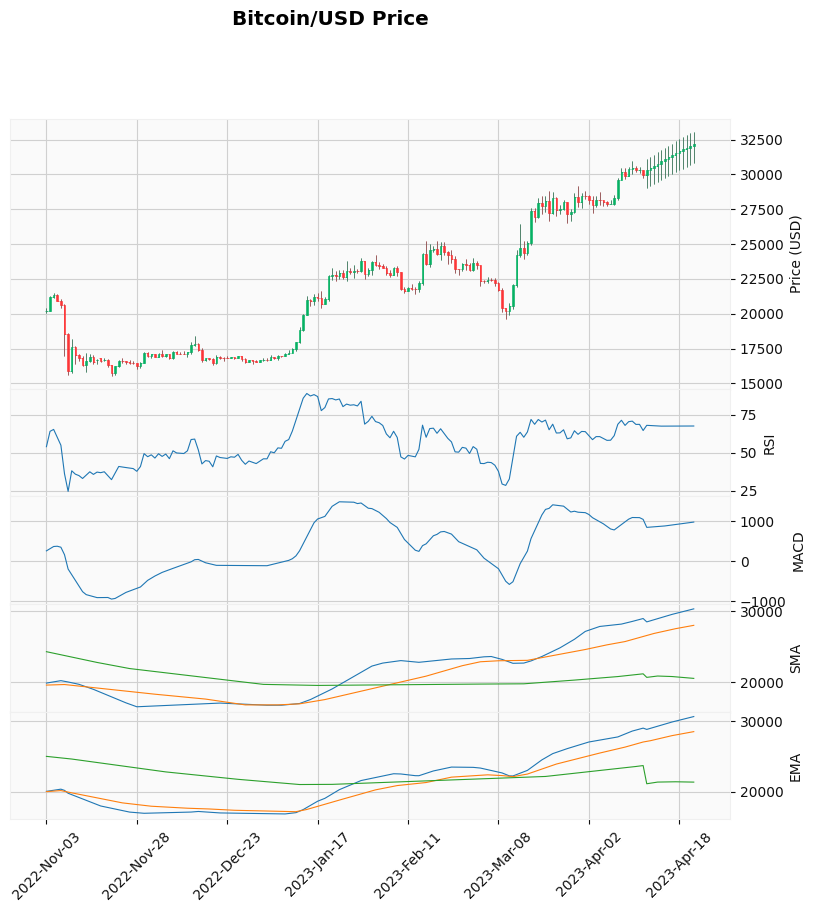

In [ ]:
# Модель обучения на BTC, ETH
window_size = 180 # Кол-во баров для обучения
flag = False # Обучать модель
if (flag):
  model = fit_predict(eth_df, window_size = window_size, new_model = True)
  model = fit_predict(btc_df, window_size = window_size, model = model, new_model = False)
df = btc_df.copy()

predict = []
def new_predict(df, model, window_size = 30, index = 0):

  # Преобразование данных scaler
  scaler = MinMaxScaler()
  data_scaled = scaler.fit_transform(df)

  # Данные future_predict_data будущего предсказания
  future_predict_data = data_scaled[-window_size:, :]
  future_predict_data = future_predict_data.reshape(1, future_predict_data.shape[0], future_predict_data.shape[1])
  predict = model.predict(future_predict_data)
  predict = scaler.inverse_transform(predict)

  # Формирование данных по времени
  date_string = '2023-04-18 00:00:00'
  dt = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')
  dt += timedelta(days=index)
  df = df.fillna(0)
  df['Close'] = df['price']
  df['Open'] = df['open']
  df['High'] = df['high']
  df['Low'] = df['low']
  df.index = pd.to_datetime(df.index)
  main_dict = {'Close': predict[-1][0],
               'Open': df['Close'][-1],
               'High': max(predict[-1][2], max(df['Close'][-1], predict[-1][0])),
               'Low': min(predict[-1][3], min(df['Close'][-1], predict[-1][0])),
               'price': predict[-1][0],
               'open': df['Close'][-1],
               'high': max(predict[-1][2], max(df['Close'][-1], predict[-1][0])),
               'low': min(predict[-1][3], min(df['Close'][-1], predict[-1][0])),
               'change': predict[-1][4]}

  # определяем значения для скользящих средних
  sma_values = {f'sma_{period_ma[i]}': predict[-1][5+i] for i in range(len(period_ma))}
  ema_values = {f'ema_{period_ma[i]}': predict[-1][8+i] for i in range(len(period_ma))}

  # определения максимального и минимального значения за период
  period = [30, 60, 90]
  max_values = {f'max_{period[i]}': predict[-1][13+i] for i in range(len(period))}
  min_values = {f'min_{period[i]}': predict[-1][16+i] for i in range(len(period))}

  # объединяем все значения в один словарь
  main_dict.update(sma_values)
  main_dict.update(ema_values)
  main_dict.update(max_values)
  main_dict.update(min_values)
  new_row = pd.DataFrame(main_dict,
                         index=[datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')])

  df = df.append(new_row)
  df.drop(columns=['Close', 'Open', 'High', 'Low'], inplace=True)
  return df
print(df.shape)
for i in range(14):
  df = new_predict(df, window_size = window_size, model = model, index = i)
  print(df.shape)
df['Close'] = df['price']
df['Open'] = df['open']
df['High'] = df['high']
df['Low'] = df['low']
df.index = pd.to_datetime(df.index)

(<Figure size 1000x1000 with 10 Axes>,
 [<Axes: ylabel='Price (USD)'>,
  <Axes: >,
  <Axes: ylabel='RSI'>,
  <Axes: >,
  <Axes: ylabel='MACD'>,
  <Axes: >,
  <Axes: ylabel='SMA'>,
  <Axes: ylabel='SMA'>,
  <Axes: ylabel='EMA'>,
  <Axes: ylabel='EMA'>])

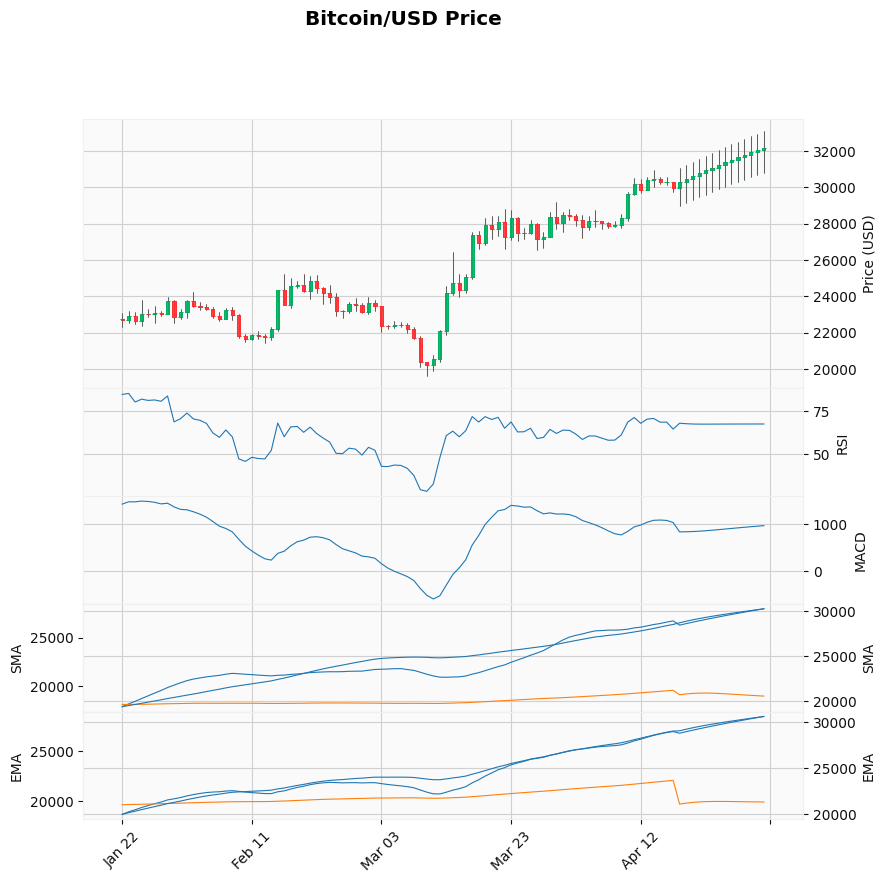

In [64]:

def plot_financial_data(data, window_size=100):
  
    # Определяем стиль
    my_style = mpf.make_mpf_style(base_mpf_style='yahoo')
    
    # Создаем addplots
    candlestick = mpf.make_addplot(data[-window_size:][['Open', 'Close', 'High', 'Low']], 
                                   type='candle', width=0.8, alpha=1.0)
    rsi = mpf.make_addplot(data[-window_size:]['rsi_14'], panel=1, 
                            ylabel='RSI', width=0.8, alpha=1.0)
    macd = mpf.make_addplot(data[-window_size:]['macd_9'], panel=2, 
                             ylabel='MACD', width=0.8, alpha=1.0)
    sma = mpf.make_addplot(data[-window_size:][['sma_20', 'sma_50', 'sma_200']], 
                            panel=3, ylabel='SMA', width=0.8, alpha=1.0)
    ema = mpf.make_addplot(data[-window_size:][['ema_20', 'ema_50', 'ema_200']], 
                            panel=4, ylabel='EMA', width=0.8, alpha=1.0)
    
    # Создаем график
    fig, ax = mpf.plot(data[-window_size:], addplot=[candlestick, rsi, macd, sma, ema], 
                       volume=False, title='Bitcoin/USD Price', ylabel='Price (USD)', 
                       figsize=(10,10), style=my_style, returnfig=True)
    
    return fig, ax

plot_financial_data(df)